In [4]:
from datetime import datetime
import json
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
from scipy.stats import t
import scipy.stats as sps
from scipy import stats

from keras import backend as kb
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential

import backtesting
import helpers
import LSTM

In [1]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
df=pd.read_csv("TSLA.csv")
# print(‘Number of rows and columns:’, df.shape)
print(df.shape)
df.head(5)

(1259, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-07-10,52.444000,52.599998,51.563999,51.830002,51.830002,13054500
1,2015-07-13,52.450001,52.509998,51.209999,52.431999,52.431999,14801500
2,2015-07-14,52.419998,53.198002,52.102001,53.130001,53.130001,9538000
3,2015-07-15,53.348000,53.498001,52.416000,52.627998,52.627998,10108000
4,2015-07-16,52.844002,53.439999,52.632000,53.335999,53.335999,8080000


In [62]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
df=pd.read_csv("WIG20.csv")
from keras import backend as kb
# print(‘Number of rows and columns:’, df.shape)
print(df.shape)
df.head(5)

(4841, 7)


,Date,Close,Open,High,Low,Vol.,Change %
0,"Jun 26, 2020",1759.43,1799.33,1800.49,1759.37,27.87M,-1.89%
1,"Jun 25, 2020",1793.36,1781.84,1798.80,1759.21,33.80M,0.51%
2,"Jun 24, 2020",1784.23,1830.39,1836.89,1784.23,38.48M,-2.29%
3,"Jun 23, 2020",1825.99,1807.10,1847.33,1806.21,44.38M,1.61%
4,"Jun 22, 2020",1797.05,1805.25,1807.19,1786.99,43.85M,-0.60%


In [63]:
df['log_return'] = np.log(1 + df['Close'].pct_change())
df = df[1:]
print(df.head())

training_set = df.iloc[:4000, 7:8].values
test_set = df.iloc[4000:, 7:8].values

# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 4000):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#(740, 60, 1)

           Date    Close     Open     High      Low    Vol. Change %  \
1  Jun 25, 2020  1793.36  1781.84  1798.80  1759.21  33.80M    0.51%   
2  Jun 24, 2020  1784.23  1830.39  1836.89  1784.23  38.48M   -2.29%   
3  Jun 23, 2020  1825.99  1807.10  1847.33  1806.21  44.38M    1.61%   
4  Jun 22, 2020  1797.05  1805.25  1807.19  1786.99  43.85M   -0.60%   
5  Jun 19, 2020  1807.85  1791.68  1809.23  1791.68  91.77M    0.67%   

   log_return  
1    0.019101  
2   -0.005104  
3    0.023135  
4   -0.015976  
5    0.005992  


In [68]:
def MSE_custom(y_actual, y_predicted):
#     return kb.sum(kb.square(y_actual - y_predicted))/kb.int_shape(y_actual)[1]
    return kb.mean((kb.square(y_actual - y_predicted)))

def MSE_var(y_actual, y_predicted):
    return kb.mean((kb.square(y_actual - y_predicted))) + 0.5*kb.mean(kb.relu((y_actual - y_predicted) * -1))

In [72]:
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = MSE_var, metrics=['mse'])

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
124/124 [==============================] - 9s 76ms/step - loss: 0.0161 - mse: 0.0119
Epoch 2/100
124/124 [==============================] - 7s 55ms/step - loss: 0.0119 - mse: 0.0079
Epoch 3/100
124/124 [==============================] - 6s 52ms/step - loss: 0.0113 - mse: 0.0074
Epoch 4/100
124/124 [==============================] - 6s 52ms/step - loss: 0.0114 - mse: 0.0075
Epoch 5/100
124/124 [==============================] - 6s 48ms/step - loss: 0.0111 - mse: 0.0072
Epoch 6/100
124/124 [==============================] - 6s 49ms/step - loss: 0.0111 - mse: 0.0073
Epoch 7/100
124/124 [==============================] - 6s 51ms/step - loss: 0.0109 - mse: 0.0071
Epoch 8/100
124/124 [==============================] - 6s 48ms/step - loss: 0.0108 - mse: 0.0070
Epoch 9/100
124/124 [==============================] - 6s 47ms/step - loss: 0.0108 - mse: 0.0069
Epoch 10/100
124/124 [==============================] - 6s 50ms/step - loss: 0.0106 - mse: 0.0068
Epoch 11/100
124/124 [=======

124/124 [==============================] - 7s 60ms/step - loss: 0.0100 - mse: 0.0063
Epoch 85/100
124/124 [==============================] - 8s 63ms/step - loss: 0.0100 - mse: 0.0062
Epoch 86/100
124/124 [==============================] - 6s 51ms/step - loss: 0.0100 - mse: 0.0063
Epoch 87/100
124/124 [==============================] - 6s 51ms/step - loss: 0.0100 - mse: 0.0062
Epoch 88/100
124/124 [==============================] - 6s 52ms/step - loss: 0.0100 - mse: 0.0062
Epoch 89/100
124/124 [==============================] - 6s 51ms/step - loss: 0.0100 - mse: 0.0062
Epoch 90/100
124/124 [==============================] - 6s 52ms/step - loss: 0.0100 - mse: 0.0063
Epoch 91/100
124/124 [==============================] - 6s 51ms/step - loss: 0.0100 - mse: 0.0063
Epoch 92/100
124/124 [==============================] - 6s 51ms/step - loss: 0.0100 - mse: 0.0062
Epoch 93/100
124/124 [==============================] - 7s 53ms/step - loss: 0.0100 - mse: 0.0062
Epoch 94/100
124/124 [===========

In [73]:
# Getting the predicted stock price of 2017
dataset_train = df.iloc[:4000, 7:8]
dataset_test = df.iloc[4000:, 7:8]
print(dataset_train.head())
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
print(inputs.shape)
# (459, 60, 1)
X_test = []
for i in range(60, 900):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
print(X_test.shape)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)

   log_return
1    0.019101
2   -0.005104
3    0.023135
4   -0.015976
5    0.005992
(900, 1)
(840, 60)
(840, 60, 1)


840


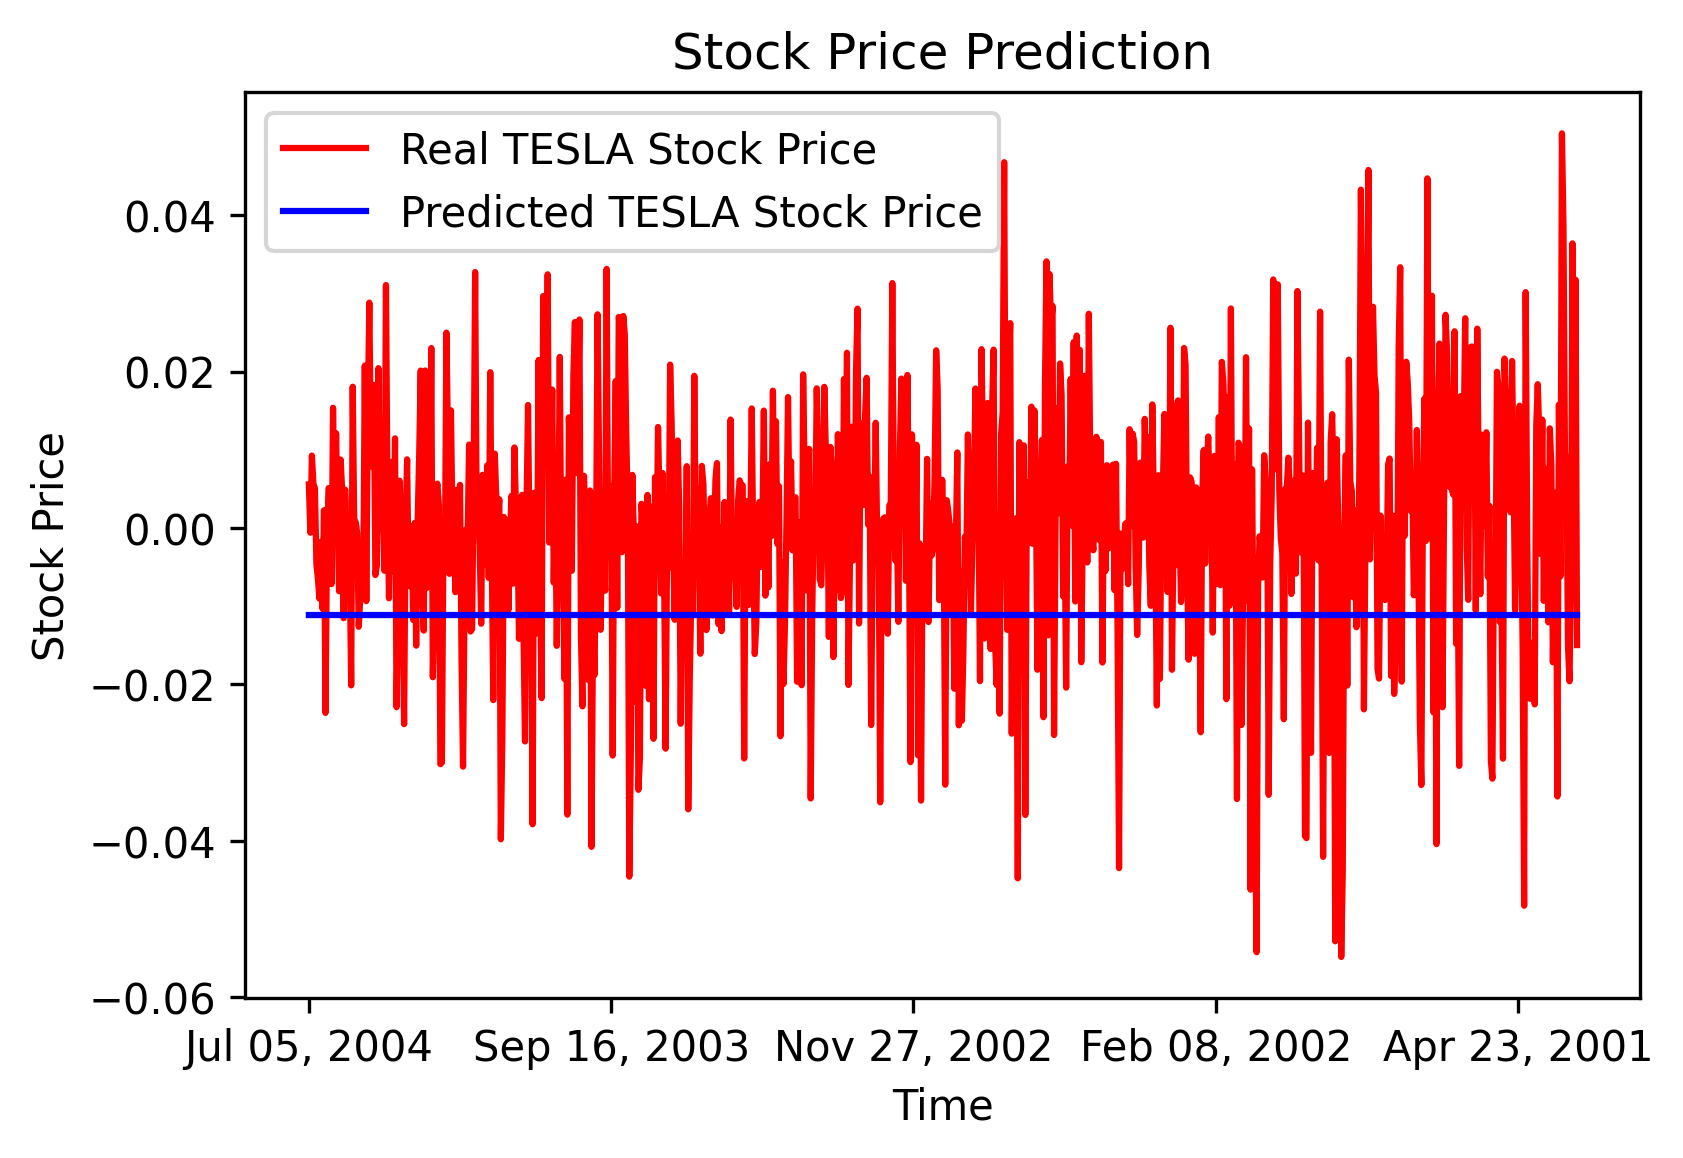

In [74]:
predicted_stock_price = model.predict(X_test)

predicted_stock_price = sc.inverse_transform(predicted_stock_price)
print(len(predicted_stock_price))
# Visualising the results
plt.figure(dpi = 300)
plt.plot(df.iloc[4000:, 0],np.array(dataset_test.values), color = 'red', label = 'Real TESLA Stock Price')
plt.plot(df.iloc[4000:, 0],np.array(predicted_stock_price), color = 'blue', label = 'Predicted TESLA Stock Price')
plt.xticks(np.arange(0,840,200))
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

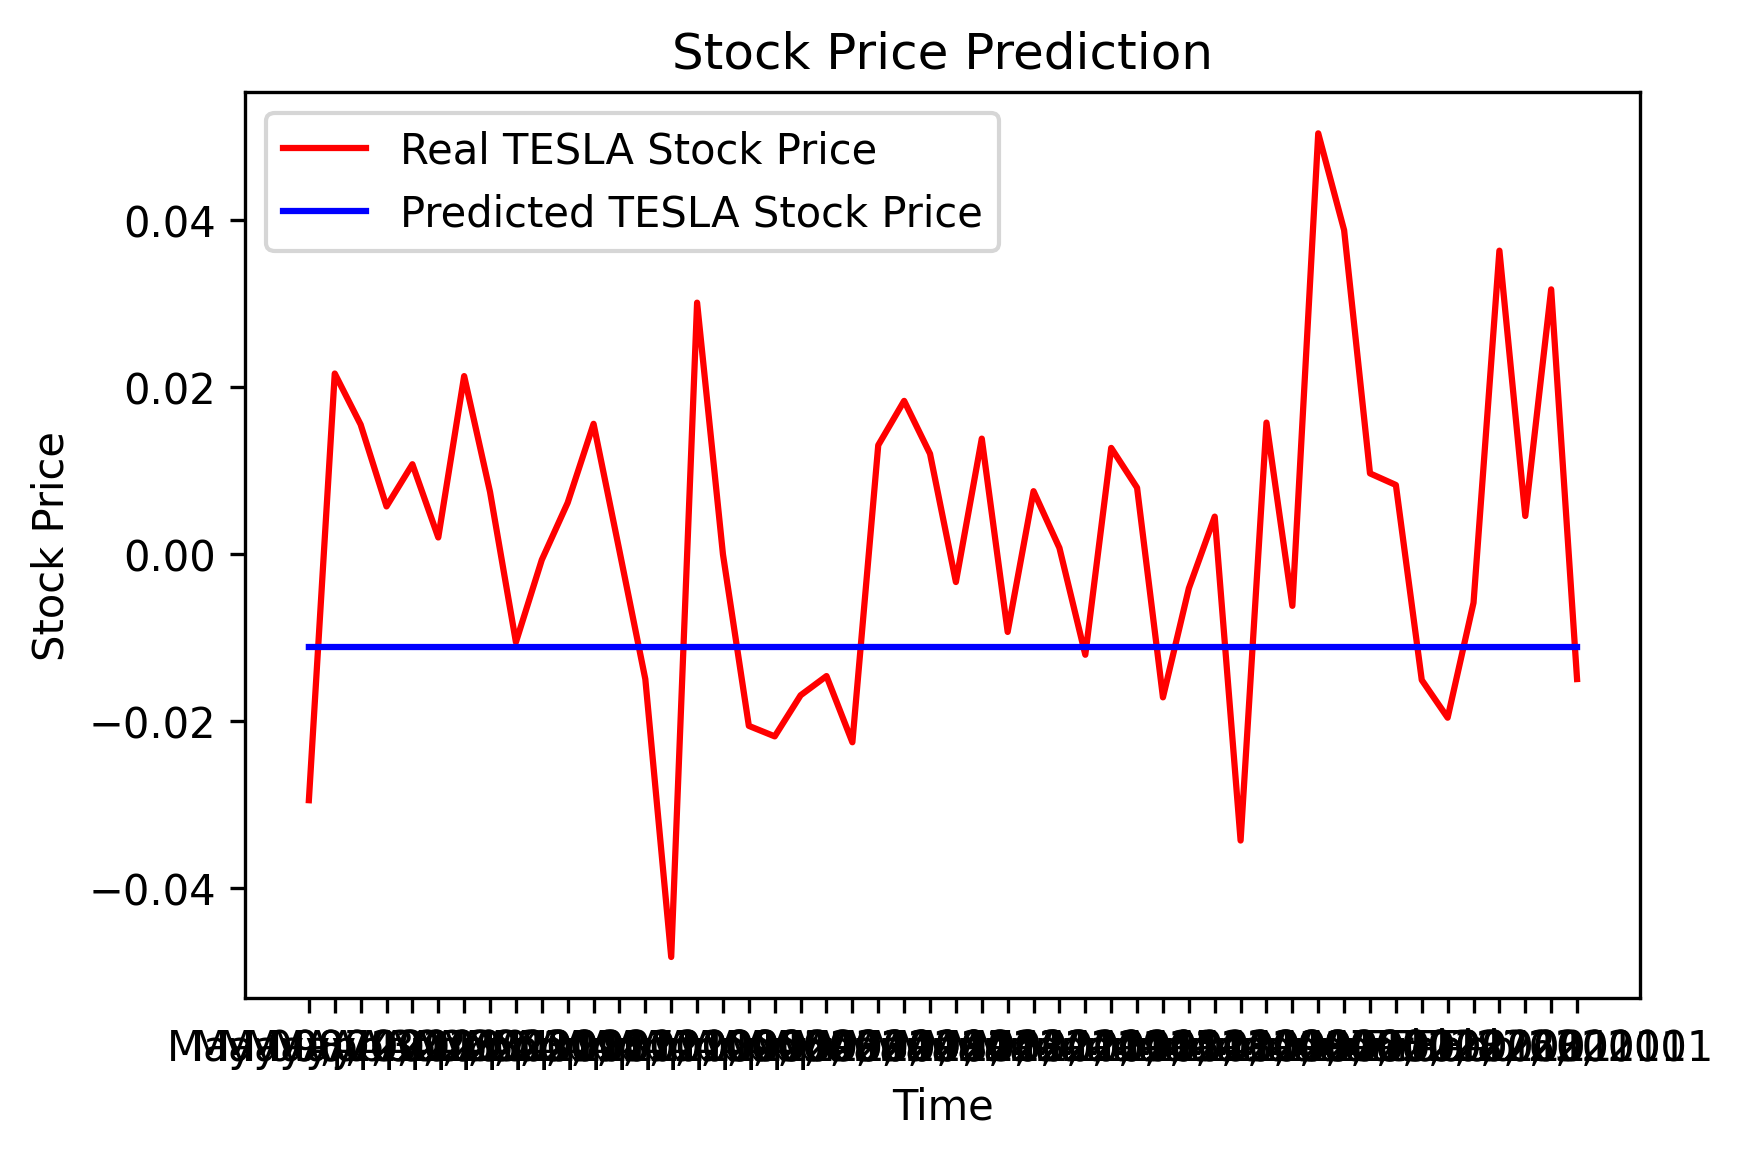

In [76]:
plt.figure(dpi = 300)
plt.plot(df.iloc[-50:, 0],np.array(dataset_test.values[-50:]), color = 'red', label = 'Real TESLA Stock Price')
plt.plot(df.iloc[-50:, 0],np.array(predicted_stock_price[-50:]), color = 'blue', label = 'Predicted TESLA Stock Price')
# plt.xticks(np.arange(0,840,200))
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [32]:
model.history.

TypeError: 'History' object is not subscriptable

In [ ]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [44]:
# class jointSupervisionLSTM define with 3 separate nets for lower upper and crisp prediction
class jointSupervisionLSTM:
    def __init__(self, input_shape = (20,1)):
        self.input_shape = input_shape

    def crisp_return_LSTM(inputs):
        x = LSTM(return_sequences = True, input_shape = (None, 1), units = 50)(inputs)
        x = Dropout(0.2)(x)
        x = LSTM(return_sequences = False, units = 100)(x)
        x = Dropout(0.2)(x)
        x = Dense(units = 10, activation = 'sigmoid')(x)
        x = Dense(units = 1,  activation = 'linear', name = 'crisp_output')(x)
        
        return x
    
    def build_JS_LSTM_model(self):
        inputs = Input(shape = self.input_shape)
        crisp_branch = jointSupervisionLSTM.crisp_return_LSTM(inputs)
        model = Sequential(
            inputs = inputs,
            outputs = [crisp_branch],
            name = 'joint_supervision_LSTM'
        )
        
        return model

In [46]:
js = jointSupervisionLSTM()

model = js.build_JS_LSTM_model()

TypeError: __init__() got an unexpected keyword argument 'inputs'

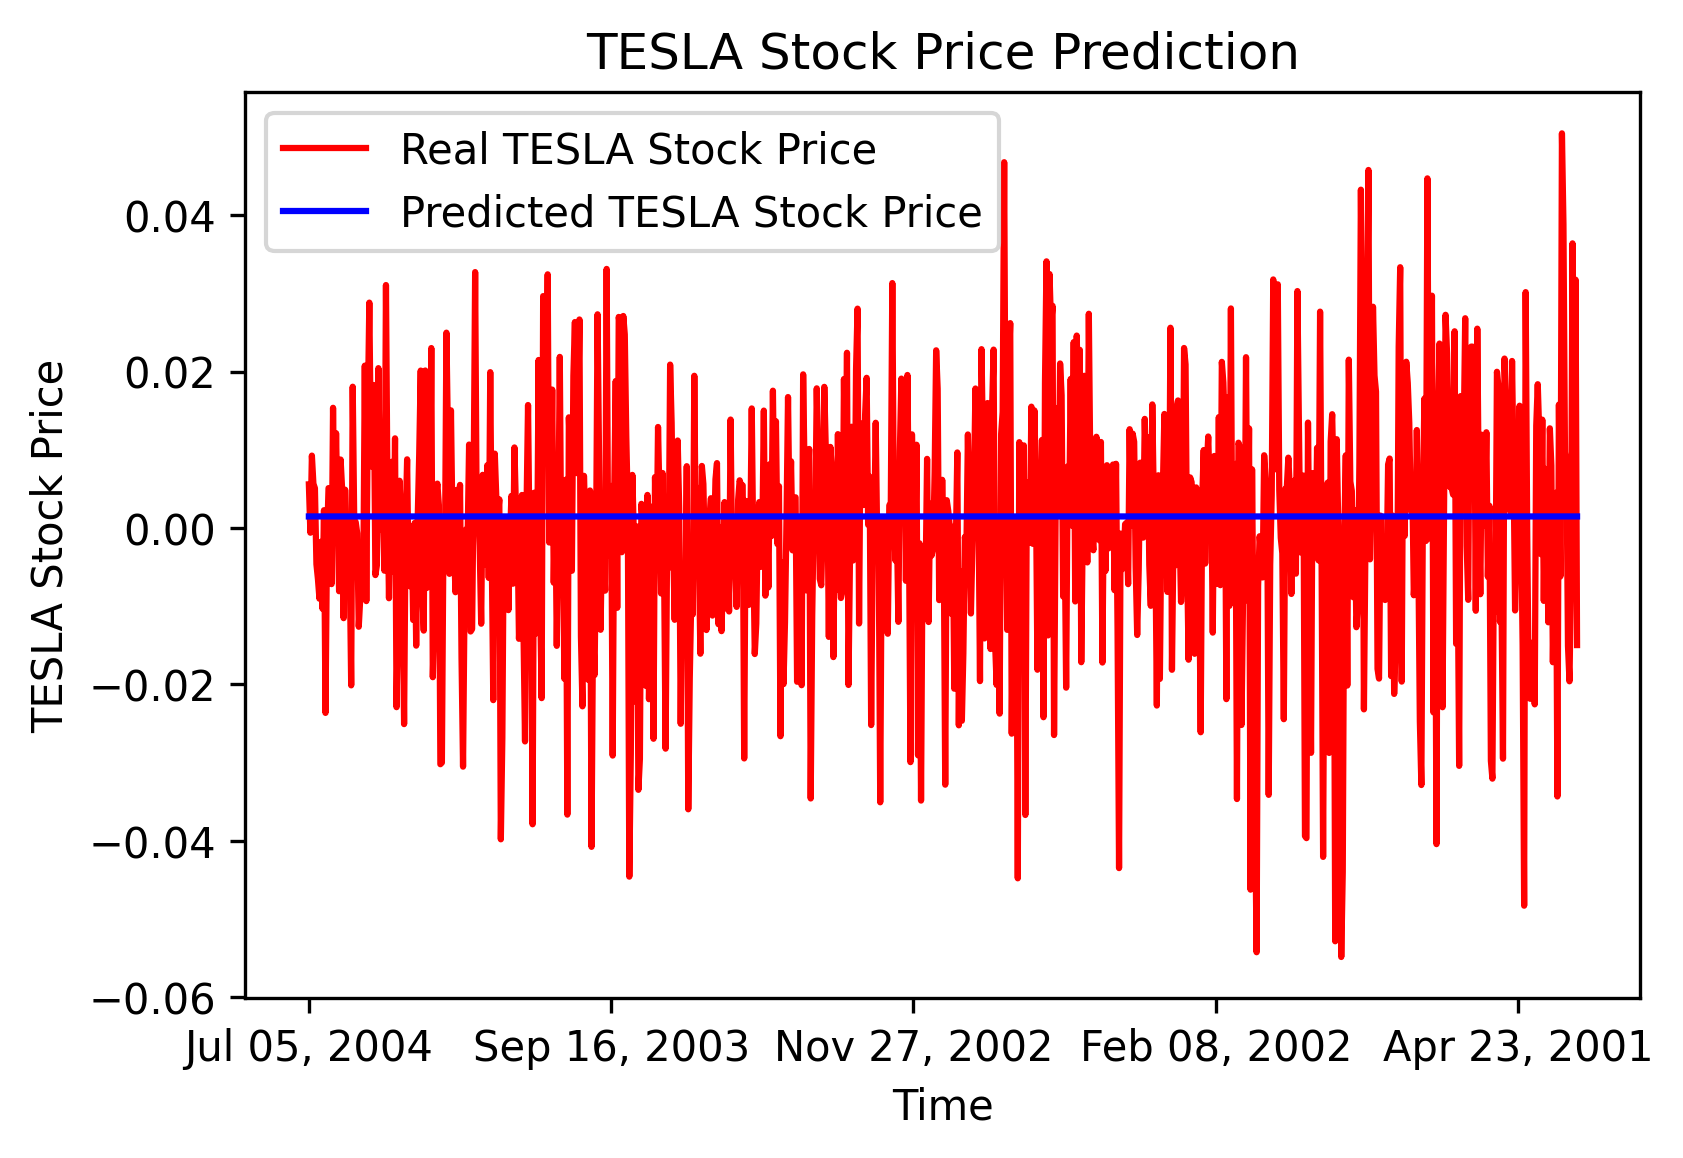

In [146]:
def MSE_

## Produce LSTM models for alpha = 0.1, 0.05, 0.01, backtest it and save to dict.
### print out prediction grafs

/home/nikanor/.virtualenvs/pocket_trader/lib/python3.6/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/nikanor/.virtualenvs/pocket_trader/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Epoch 1/50
8/8 - 1s - loss: 4.7159e-04 - val_loss: 9.2600e-05
Epoch 2/50
8/8 - 0s - loss: 1.7607e-04 - val_loss: 6.9006e-05
Epoch 3/50
8/8 - 0s - loss: 1.0791e-04 - val_loss: 2.1071e-05
Epoch 4/50
8/8 - 0s - loss: 7.6767e-05 - val_loss: 1.6429e-05
Epoch 5/50
8/8 - 0s - loss: 5.8634e-05 - val_loss: 6.9255e-06
Epoch 6/50
8/8 - 0s - loss: 4.8229e-05 - val_loss: 7.7197e-06
Epoch 7/50
8/8 - 0s - loss: 4.1151e-05 - val_loss: 5.1493e-06
Epoch 8/50
8/8 - 0s - loss: 3.7797e-05 - val_loss: 5.1500e-06
Epoch 9/50
8/8 - 1s - loss: 3.4755e-05 - val_loss: 4.3155e-06
Epoch 10/50
8/8 - 0s - loss: 3.1647e-05 - val_loss: 4.3120e-06
Epoch 11/50
8/8 - 0s - loss: 2.8275e-05 - val_loss: 4.3454e-06
Epoch 12/50
8/8 - 0s - loss: 2.8914e-05 - val_loss: 4.4437e-06
Epoch 13/50
8/8 - 0s - loss: 2.6108e-05 - val_loss: 3.4591e-06
Epoch 14/50
8/8 - 0s - loss: 2.4496e-05 - val_loss: 5.8326e-06
Epoch 15/50
8/8 - 1s - loss: 2.4566e-05 - val_loss: 3.4871e-06
Epoch 16/50
8/8 - 0s - loss: 2.2795e-05 - val_loss: 3.7644e-06
E

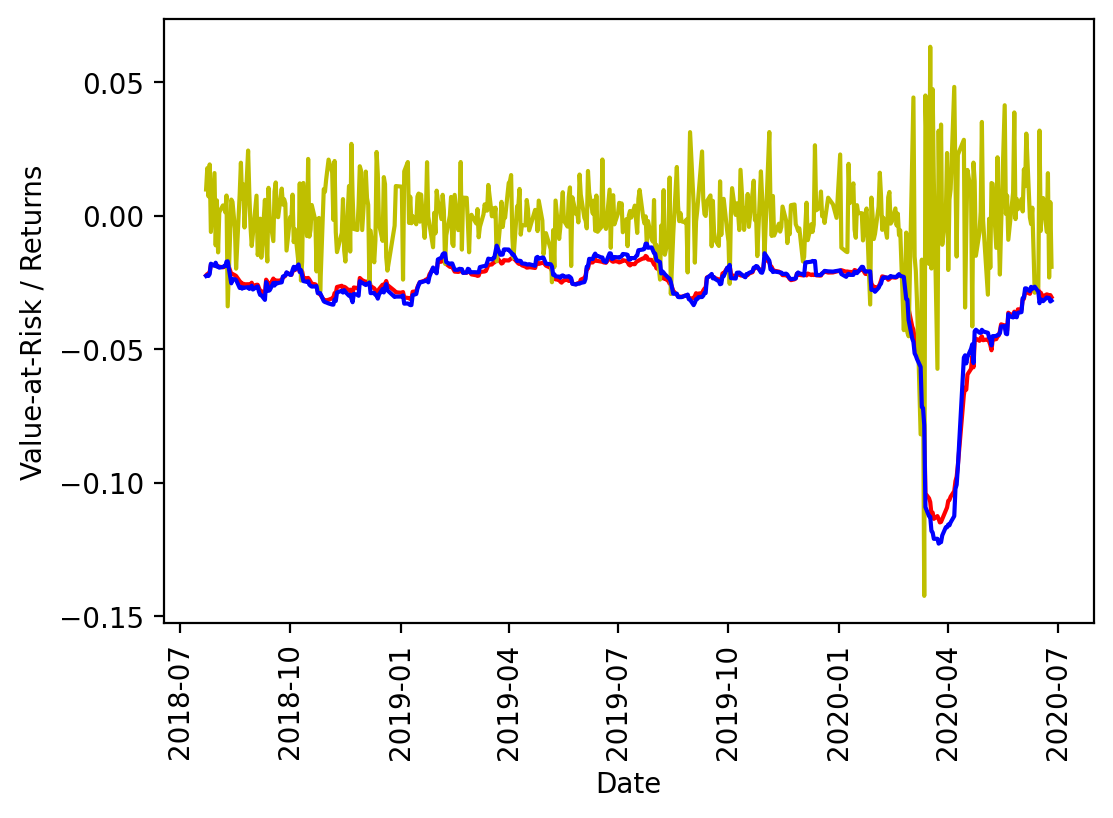

In [5]:
bt = {}
# for index in {'PX', 'WIG20', 'BUX', 'SAX'}:
for index in {'WIG20'}:
#     for alpha in {0.1, 0.05, 0.01}:
    for alpha in {0.05}:
        # random seed
        np.random.seed(111)

        # load the data
        path_to_dataset = f'{index}.csv'
        data = pd.read_csv(path_to_dataset, index_col = 'Date')
        data.index = pd.to_datetime(data.index)
        data.sort_values(by = ['Date'], inplace=True, ascending=True)

        #obtaining log returns
        data['log_return'] = np.log(1 + data['Close'].pct_change())
        data = data[1:]

        sequence_length = 20  # here we decide how far back we gonna take a look for prediction
        days_ahead = 1

        # Value at Risk based on realized data with t distribution assumption
        data['VaR'] = 0
        data['VaR'][1:] = helpers.historical_VaR(data['log_return'], 20, alpha)
        data = data[20:]

        # data['norm_return'] = (data['log_return'] - data['log_return'].mean()) / data['log_return'].std()
        data['norm_return'] = helpers.normalization(data['log_return'])

        x_train, y_train, x_test, y_test = helpers.data_preprocessing(
            returns = data['norm_return'],
            value_at_risk = data['VaR'],
            sequence_length = sequence_length,
            days_in_advance = days_ahead,
            split = 0.9
        )

        var_lstm_model = LSTM.lstm_for_var()

        # train the model
        var_lstm_model.fit(x_train, y_train, batch_size=512, epochs=50, validation_split=0.15, verbose=2)

        # evaluate the result
        test_mse = var_lstm_model.evaluate(x_test, y_test, verbose=1)
        print(f'\nThe mean squared error (MSE) on the test data set is {test_mse} over {len(y_test)} test samples.')

        predicted_values = var_lstm_model.predict(x_test)
        num_test_samples = len(predicted_values)
        predicted_values = np.reshape(predicted_values, (num_test_samples,))
        y_pred = pd.DataFrame(predicted_values, index = data[-num_test_samples:].index)

        # plot the results
        fig = plt.figure(dpi = 200)
        # plt.plot(y_test, 'b')
        plt.plot(y_pred, 'r')
        # plt.plot(predicted_values)
        plt.plot(data['log_return'][-len(y_pred):], 'y')
        plt.plot(data['VaR'][-len(y_pred):], 'b')
        # plt.plot((y_test + shifted_value)*(maximum-minimum) + minimum)
        # plt.plot((predicted_values + shifted_value)*(maximum-minimum) + minimum)

        plt.xlabel('Date')
        plt.ylabel('Value-at-Risk / Returns')
        # plt.xaxis.set_major_formatter(matplotlib.dates.DateFormatter("%Y-%m"))
        # plt.xaxis.set_minor_formatter(matplotlib.dates.DateFormatter("%Y-%m"))
        _=plt.xticks(rotation=90)  
        plt.show()
#         fig.savefig(f'prediction_plot_{index}_{alpha}.png', bbox_inches='tight')

        real = data['log_return'][-len(y_pred):]
        pred = predicted_values
        backtests = backtesting.BackTest(
            actual = data['log_return'][-len(y_pred):],
            forecast = predicted_values,
            alpha = alpha
        )
        bt[index + '_' + str(alpha)] = backtests.back_test()
        

### writing back-testing data to file

In [6]:
bt

{'WIG20_0.05':                statistic  p-value test outcome
 Unconditional   2.321704  0.12758       Accept
 Independence    2.243468  0.13418       Accept
 Conditional     4.565171  0.10202       Accept}

In [ ]:
with open('backtesting_results.json', 'w') as outfile:
    json.dump(bt, outfile)
